In [ ]:
import cv2
import numpy as np

video = cv2.VideoCapture("road_car_view.mp4")

while True:
    ret, orig_frame = video.read()
    if not ret:
        video = cv2.VideoCapture("road_car_view.mp4")
        continue
        
    frame = cv2.GaussianBlur(orig_frame, (5, 5), 0)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    low_yellow = np.array([18, 94, 140])
    up_yellow = np.array([48, 255, 255])
    mask = cv2.inRange(hsv, low_yellow, up_yellow)
    edges = cv2.Canny(mask, 75, 150)
    
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=50)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)
            
    cv2.imshow("frame", frame)
    cv2.imshow("edges", edges)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

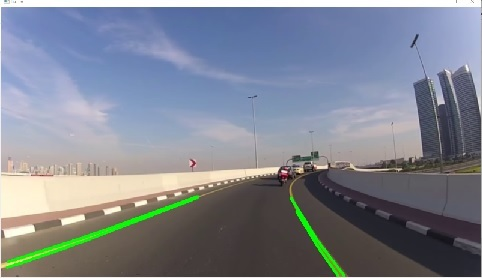